<a href="https://colab.research.google.com/github/Shirley31415926/API_heatwave/blob/main/topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install bertopic[all] -q
!pip install sentence-transformers -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.3 MB/s eta 0:00:00


In [ ]:
# BERTopic input
!pip install bertopic
!pip install plotly
!pip install umap-learn

  Using cached bertopic-0.17.0-py3-none-any.whl.metadata (23 kB)
Using cached bertopic-0.17.0-py3-none-any.whl (150 kB)


# 2023 Topic modelling

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-04-26 15:33:08,487 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/62 [00:00<?, ?it/s]

2025-04-26 15:33:52,231 - BERTopic - Embedding - Completed ✓
2025-04-26 15:33:52,236 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-26 15:34:04,419 - BERTopic - Dimensionality - Completed ✓
2025-04-26 15:34:04,423 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-26 15:34:10,272 - BERTopic - Cluster - Completed ✓
2025-04-26 15:34:10,280 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-26 15:34:10,947 - BERTopic - Representation - Completed ✓


Topic summaries:
   0 → plants_flowers
   1 → sweating_sweat
   2 → wildlife_water
   3 → power_grid
   4 → je_na
   5 → california_redding
   6 → help_supplies
   7 → scotland_uk
   8 → dinner_cheese
   9 → end heatwave_heatwave tomorrow
  10 → add lighting_anarchy
  11 → summer_sheith
  12 → dresses_wear
  13 → emoji_paste
  14 → autumn_almost upon
  15 → _
  16 → rain_raining
  17 → melting_melting heatwave
  18 → overnight_killer
  19 → heatwave killing_overheating
  20 → thunderstorm_thunder
  21 → soul_music
  22 → halloween_spooky
  23 → cat_cat heatwave
  24 → severe heat_hundreds millions
  25 → bottom row_rid
  26 → school_parents
  27 → italy_italian
  28 → ice cream_cream
  29 → el nio_nio
  30 → coffee_read
  31 → next couple_coming heatwave
  32 → red alerts_alerts
  33 → portland_seattle heatwave
  34 → current uk_tabloid
  35 → corn_corn corn
  36 → ks_mile
  37 → lady_ankle
  38 → aloe_sunscreen
  39 → border_migrants
  40 → sleep_didnt sleep
  41 → chronic pain_chroni

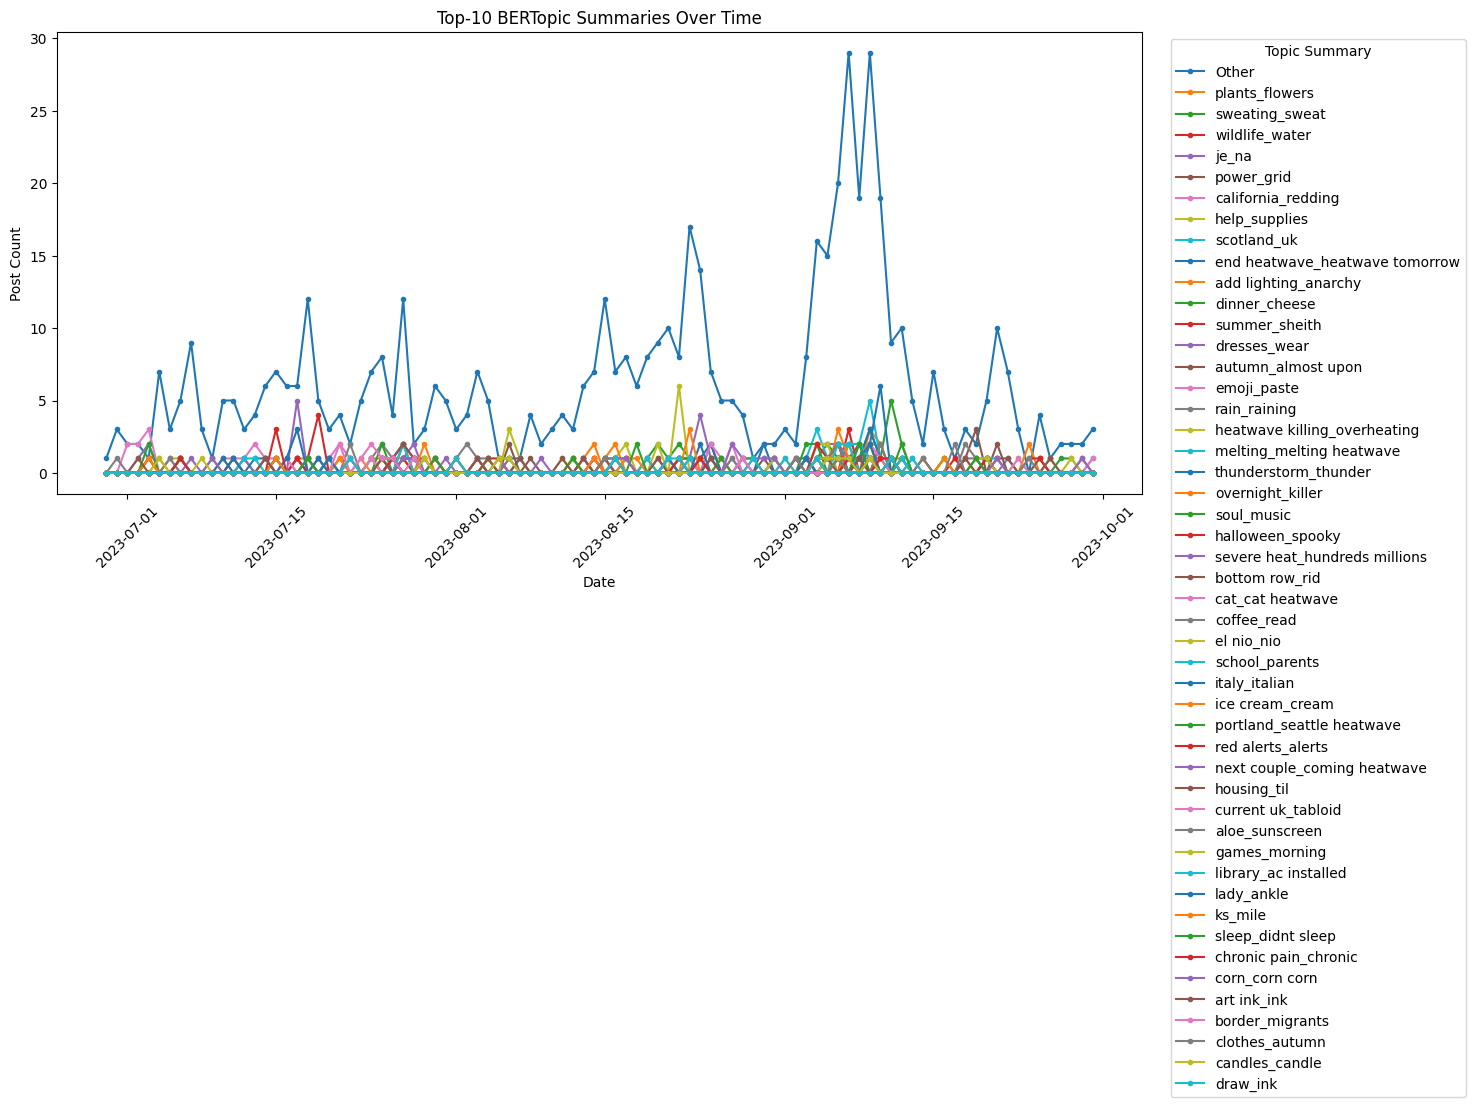

94it [00:06, 14.90it/s]


In [19]:
!pip install bertopic umap-learn plotly nltk sentence-transformers -q


import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
import plotly.io as pio

pio.renderers.default = "colab"

nltk.download("stopwords")
STOP_WORDS = stopwords.words("english")

###Load & preprocess data
DATA_PATH = "/content/drive/MyDrive/heat_posts2023.jsonl"
posts_df = pd.read_json(DATA_PATH, lines=True)

def clean_text(text: str) -> str:
    """Lowercase, remove URLs and non-alpha characters."""
    text = text.lower()
    text = re.sub(r"https?://\S+", "", text)
    text = re.sub(r"www\.\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

# Apply cleaning and parse dates
posts_df["clean_text"] = posts_df["text"].apply(clean_text)
posts_df["date"]       = pd.to_datetime(posts_df["created_at"]).dt.date

texts = posts_df["clean_text"].tolist()
dates = posts_df["date"].tolist()

###Fit BERTopic model
# Using a smaller min_topic_size so even tiny clusters survive
topic_model = BERTopic(
    embedding_model   = SentenceTransformer("all-MiniLM-L6-v2"),
    vectorizer_model  = CountVectorizer(stop_words=STOP_WORDS, ngram_range=(1,2)),
    language          = "english",
    calculate_probabilities = True,
    verbose           = True,
    min_topic_size    = 2,
)

topics, probs = topic_model.fit_transform(texts)
posts_df["topic"] = topics

###Auto‐generate summaries for each topic
summary_map = {}
for t in topic_model.get_topic_info().Topic:
    if t == -1:
        continue
    top2 = [w for w,_ in topic_model.get_topic(t)[:2]]
    summary_map[t] = "_".join(top2)

posts_df["topic_summary"] = posts_df["topic"].map(lambda t: summary_map.get(t, "Other"))


print("Topic summaries:")
for t, label in summary_map.items():
    print(f"  {t:2d} → {label}")

###“Health / Energy / Policy / Climate” mapping
label_dict = {
    "Health":  ["heatstroke","hospital","dehydration","emergency","risk","dizzy","overheat"],
    "Energy":  ["power","outage","electricity","grid","air conditioning","cooling","blackout"],
    "Policy":  ["government","response","support","aid","fund","relief","governor"],
    "Climate": ["climate","crisis","warming","carbon","emission","anxiety"]
}

def assign_label(keywords, mapping):
    keys = set(w for w,_ in keywords)
    scores = {lbl: len(keys & set(words)) for lbl,words in mapping.items()}
    return max(scores, key=scores.get) if max(scores.values())>0 else "Other"

topic_label_map = {
    t: assign_label(topic_model.get_topic(t), label_dict)
    for t in summary_map.keys()
}
posts_df["semantic_label"] = posts_df["topic"].map(lambda t: topic_label_map.get(t, "Other"))

###Visualize topic‐summary trends over time
time_df = posts_df.groupby(["date","topic_summary"]).size().unstack(fill_value=0)
# pick top 10 summaries by overall counts
top10 = time_df.sum().sort_values(ascending=False).head(50).index

plt.figure(figsize=(14,6))
for lbl in top10:
    plt.plot(time_df.index, time_df[lbl], marker=".", label=lbl)

plt.title("Top-10 BERTopic Summaries Over Time")
plt.xlabel("Date")
plt.ylabel("Post Count")
plt.xticks(rotation=45)
plt.legend(title="Topic Summary", bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout()
plt.show()

###results
posts_df.to_csv("heatwave_posts_with_topics.csv", index=False)
pd.DataFrame(topic_model.topics_over_time(texts, dates)).to_csv("topics_over_time.csv", index=False)


In [20]:
topic_model.visualize_barchart(top_n_topics=35).show()

# 2024 Topic modelling

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-04-26 15:37:45,242 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/127 [00:00<?, ?it/s]

2025-04-26 15:39:09,189 - BERTopic - Embedding - Completed ✓
2025-04-26 15:39:09,191 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-26 15:39:37,989 - BERTopic - Dimensionality - Completed ✓
2025-04-26 15:39:37,992 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-26 15:40:38,053 - BERTopic - Cluster - Completed ✓
2025-04-26 15:40:38,061 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-26 15:40:39,044 - BERTopic - Representation - Completed ✓


Topic summaries:
   0 → india_delhi
   1 → music_boogie nights
   2 → rain_thunderstorm
   3 → september_october
   4 → writing_story
   5 → ac_ac broke
   6 → antarctic_antarctica
   7 → canada_environment
   8 → sleep_bed
   9 → week_next week
  10 → sweat_sweating
  11 → heatwave ecosearch_ecosearch
  12 → summer finally_summer
  13 → reaching_range
  14 → covid_covid heatwave
  15 → birds_bird
  16 → plants_plant
  17 → fuck heatwave_fuck
  18 → wrestling_nxt
  19 → stream_streaming
  20 → ssts_sat
  21 → dog_dogs
  22 → mexico_times likely
  23 → really like_hand
  24 → heatwave heatwave_aim think
  25 → flowers_blooms
  26 → power_generator
  27 → pop_heatwave getting
  28 → disabled_pls
  29 → lucky heatwave_cooler
  30 → headache_terrible headache
  31 → prison_womens
  32 → county_wildfires
  33 → hajj_hundreds
  34 → third_supposed last
  35 → marine_coral
  36 → math_druid
  37 → finland_norway
  38 → tea_lemonade
  39 → stay hydrated_hydrated
  40 → wear_dress
  41 → climat

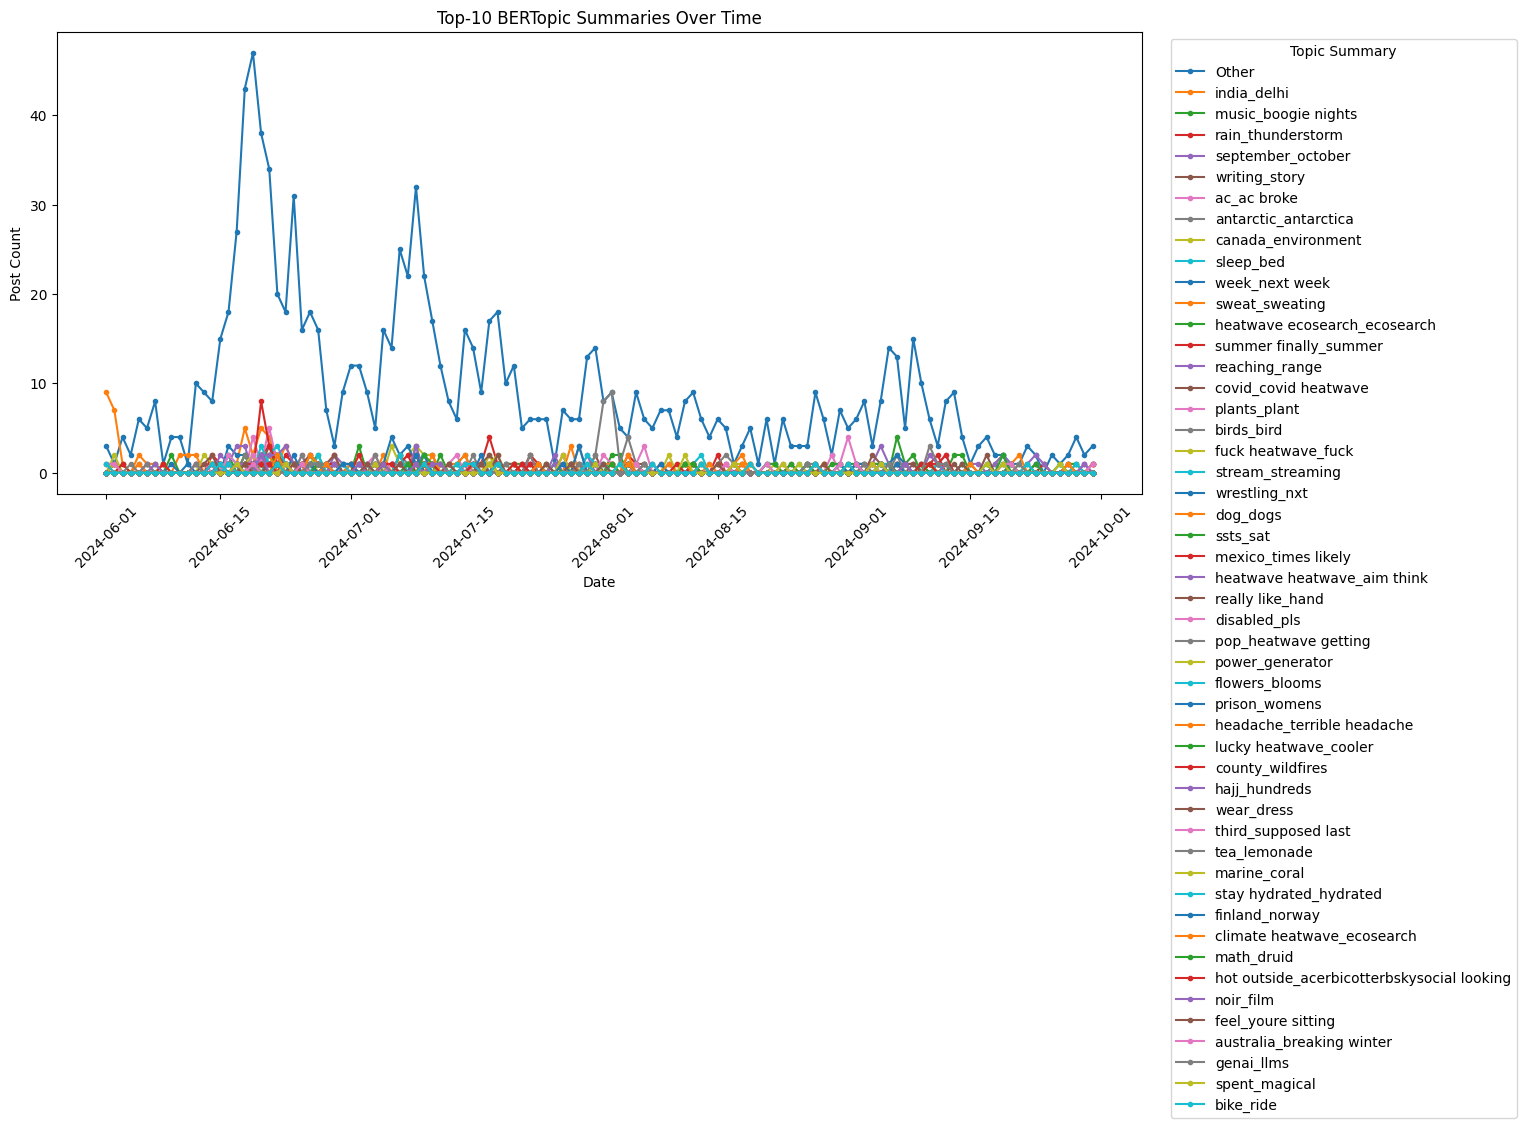

2025-04-26 15:40:41,311 - BERTopic - WARNING: There are more than 100 unique timestamps (i.e., 122) which significantly slows down the application. Consider setting `nr_bins` to a value lower than 100 to speed up calculation. 
122it [00:17,  7.06it/s]


In [21]:
!pip install bertopic umap-learn plotly nltk sentence-transformers -q

import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
import plotly.io as pio


pio.renderers.default = "colab"

nltk.download("stopwords")
STOP_WORDS = stopwords.words("english")

###Load data
DATA_PATH = "/content/drive/MyDrive/heat_posts2024_standardized.jsonl"
posts_df = pd.read_json(DATA_PATH, lines=True)

def clean_text(text: str) -> str:
    """Lowercase, remove URLs and non-alpha characters."""
    text = text.lower()
    text = re.sub(r"https?://\S+", "", text)
    text = re.sub(r"www\.\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

posts_df["clean_text"] = posts_df["text"].apply(clean_text)
posts_df["date"]       = pd.to_datetime(posts_df["created_at"]).dt.date

texts = posts_df["clean_text"].tolist()
dates = posts_df["date"].tolist()


### Fit BERTopic model
# Using a smaller min_topic_size so even tiny clusters survive
topic_model = BERTopic(
    embedding_model   = SentenceTransformer("all-MiniLM-L6-v2"),
    vectorizer_model  = CountVectorizer(stop_words=STOP_WORDS, ngram_range=(1,2)),
    language          = "english",
    calculate_probabilities = True,
    verbose           = True,
    min_topic_size    = 2,
)

topics, probs = topic_model.fit_transform(texts)
posts_df["topic"] = topics


#  Auto‐generate summaries for each topic
summary_map = {}
for t in topic_model.get_topic_info().Topic:
    if t == -1:
        continue
    top2 = [w for w,_ in topic_model.get_topic(t)[:2]]
    summary_map[t] = "_".join(top2)

posts_df["topic_summary"] = posts_df["topic"].map(lambda t: summary_map.get(t, "Other"))

print("Topic summaries:")
for t, label in summary_map.items():
    print(f"  {t:2d} → {label}")

# “Health / Energy / Policy / Climate” mapping
label_dict = {
    "Health":  ["heatstroke","hospital","dehydration","emergency","risk","dizzy","overheat"],
    "Energy":  ["power","outage","electricity","grid","air conditioning","cooling","blackout"],
    "Policy":  ["government","response","support","aid","fund","relief","governor"],
    "Climate": ["climate","crisis","warming","carbon","emission","anxiety"]
}

def assign_label(keywords, mapping):
    keys = set(w for w,_ in keywords)
    scores = {lbl: len(keys & set(words)) for lbl,words in mapping.items()}
    return max(scores, key=scores.get) if max(scores.values())>0 else "Other"

topic_label_map = {
    t: assign_label(topic_model.get_topic(t), label_dict)
    for t in summary_map.keys()
}
posts_df["semantic_label"] = posts_df["topic"].map(lambda t: topic_label_map.get(t, "Other"))

### visualize topic‐summary trends over time
# pivot
time_df = posts_df.groupby(["date","topic_summary"]).size().unstack(fill_value=0)
# pick top 10 summaries by overall counts
top10 = time_df.sum().sort_values(ascending=False).head(50).index


plt.figure(figsize=(14,6))
for lbl in top10:
    plt.plot(time_df.index, time_df[lbl],marker=".", label=lbl)

plt.title("Top-10 BERTopic Summaries Over Time")
plt.xlabel("Date")
plt.ylabel("Post Count")
plt.xticks(rotation=45)
plt.legend(title="Topic Summary", bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout()
plt.show()

### results
posts_df.to_csv("heatwave_posts_with_topics.csv", index=False)
pd.DataFrame(topic_model.topics_over_time(texts, dates)).to_csv("topics_over_time.csv", index=False)


In [22]:
topic_model.visualize_barchart(top_n_topics=35).show()